In [ ]:
#first import the libraries

import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time

def display_image(image):
    fig, axes = plt.subplots(figsize=(12, 8))

    if image.ndim == 2:
        axes.imshow(image, cmap='gray', vmin=0, vmax=255)
    else:
        axes.imshow(image)

    plt.show()

def display_image_pair(first_image, second_image):
    #this funciton from Computer vision course notes 
    # When using plt.subplots, we can specify how many plottable regions we want to create through nrows and ncols
    # Here we are creating a subplot with 2 columns and 1 row (i.e. side-by-side axes)
    # When we do this, axes becomes a list of length 2 (Containing both plottable axes)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
    
    # TODO: Call imshow on each of the axes with the first and second images
    #       Make sure you handle both RGB and grayscale images
    if first_image.ndim == 2:
        axes[0].imshow(first_image, cmap='gray', vmin=0, vmax=255)
    else:
        axes[0].imshow(first_image)

    if second_image.ndim == 2:
        axes[1].imshow(second_image, cmap='gray', vmin=0, vmax=255)
    else:
        axes[1].imshow(second_image)

    plt.show()

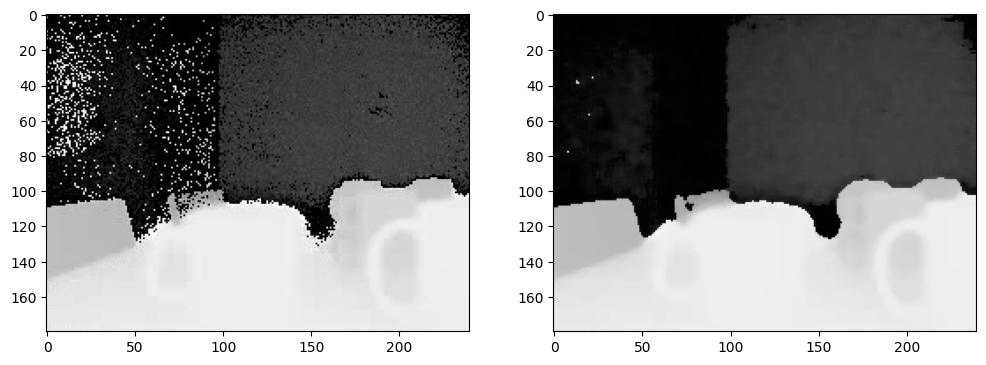

In [15]:
image = cv2.imread('./frames_out/tof_out/tof_0_1.jpg', cv2.IMREAD_GRAYSCALE)
filtered_image = cv2.medianBlur(image,5)
display_image_pair(image, filtered_image)


[[3.8575671 ]
 [0.29108229]
 [3.07533333]
 [1.06452763]
 [3.96933266]
 [0.64650955]
 [3.17166045]
 [3.62212167]
 [1.47806141]
 [2.99920411]
 [0.39199659]
 [0.5030539 ]
 [3.29741579]
 [0.84597413]
 [3.46210339]
 [3.7320402 ]]


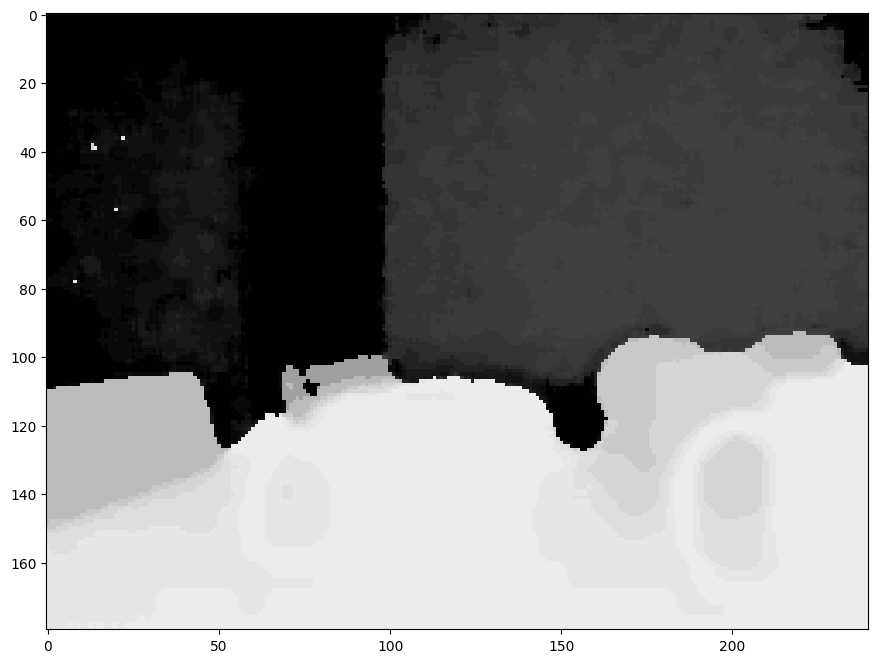

In [16]:
pixels = filtered_image.reshape(-1, 1)

np.random.seed(42)

# Define the size of the random sample
sample_size = 10000

# Take a random sample from the pixels array
random_sample = np.random.choice(pixels.flatten(), size=sample_size)
random_sample=random_sample.reshape(-1,1)


# Perform k-means clustering
k = 16  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0,n_init=10)
kmeans.fit(random_sample)#pixels)
t2 = time.time()
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
clusters = kmeans.predict(pixels)
print((255-cluster_centers)*4/255)

clustered_image = cluster_centers[clusters].reshape(image.shape)
# Convert the spread image to 8-bit for visualization
clustered_image = np.uint8(clustered_image)



display_image(clustered_image)


0.012609243392944336


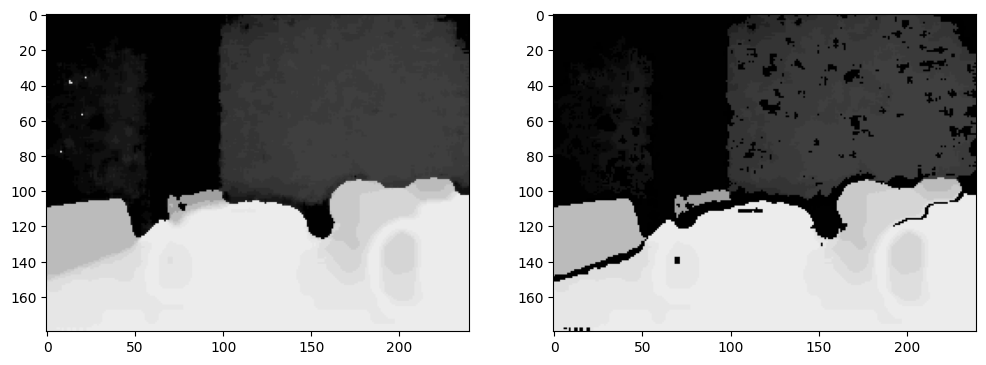

In [20]:
t1 = time.time()
gray_level_ranges = [(*i-1, *i+1) for i in cluster_centers]
segmentation_masks = np.zeros_like(clustered_image, dtype=np.uint8)
q = 1
qq=1
num_labels=[]
labels = []
stats = []
seg_masks = []
# Iterate over each region and create a segmentation mask
for i, (min_level, max_level) in enumerate(gray_level_ranges):
    # Apply thresholding to create a binary image for the current region
    _, binary_image = cv2.threshold(clustered_image, min_level, 255, cv2.THRESH_BINARY)
    _, upper_thresholded = cv2.threshold(clustered_image, max_level, 255, cv2.THRESH_BINARY_INV)
    binary_image = cv2.bitwise_and(binary_image, upper_thresholded)

    # Apply connected component labeling
    # t1 = time.time()
    num_labels_, labels_, stats_, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    # t2 = time.time()
    # print(t2-t1)
    # for s in stats_:
    #     stats.append(s)
    num_labels.append(num_labels_)
    labels.append(labels_)
    
    # Assign a unique label to the corresponding pixels in the segmentation masks
    p = 1
    for p, st in enumerate(stats_):# range(q, q+num_labels_-1):
        if p==0:
            continue        
        elif st[cv2.CC_STAT_AREA] < 100:
            segmentation_masks[labels_ == p] = 0
            #color[labels_ == p] = color[labels_ == p]
        else:
            stats.append(st)
            segmentation_masks[labels_ == p] =cluster_centers[i]
            
        p+=1
    # break
t2 = time.time()

print(t2-t1)
display_image_pair(clustered_image,segmentation_masks)

In [21]:
binary_image.shape

(180, 240)

In [14]:
image.shape

(180, 240, 3)